<a href="https://colab.research.google.com/github/kjghfnxggdgbvg/kjghfnxggdgbvg/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report ,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split

READ THE DATASET

In [3]:
data = pd.read_csv("/content/forestfires.csv")

In [4]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [5]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [6]:
data.tail()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small
516,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,...,0,0,0,0,0,0,1,0,0,small


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [8]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**let us check according to month and day with size_category (groupby)**

In [9]:
data.groupby(['month','size_category'])['size_category'].count()

month  size_category
apr    large              2
       small              7
aug    large             43
       small            141
dec    large              8
       small              1
feb    large              6
       small             14
jan    small              2
jul    large              9
       small             23
jun    large              3
       small             14
mar    large             12
       small             42
may    large              1
       small              1
nov    small              1
oct    large              4
       small             11
sep    large             51
       small            121
Name: size_category, dtype: int64

### by grouping we observe that in month of nov and jan burned area is not large
### in month of aug and sep large in burned area

In [10]:
data.groupby(['day','size_category'])['size_category'].count()

day  size_category
fri  large            21
     small            64
mon  large            19
     small            55
sat  large            26
     small            58
sun  large            27
     small            68
thu  large            13
     small            48
tue  large            20
     small            44
wed  large            13
     small            41
Name: size_category, dtype: int64

##### during friday , saturday and sunday large area are burnt

**checking duplicates**

In [11]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
512    False
513    False
514    False
515    False
516    False
Length: 517, dtype: bool

In [12]:
data.drop('month',axis=1,inplace=True)

In [13]:
data.drop('day',axis=1,inplace=True)

**get dummies**

In [14]:
data['size_category'].unique()

array(['small', 'large'], dtype=object)

In [15]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [16]:
data['size_category'] = label_encoder.fit_transform(data['size_category'])

data['size_category'].unique()

array([1, 0])

In [17]:
data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


**NO MISSING VALUE**

**OUTLIERS DETECTION**

In [18]:
data.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x79ed92dc13f0>,
 'caps': [<matplotlib.lines.Line2D at 0x79ed92dc19f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79ed92dc10f0>],
 'medians': [<matplotlib.lines.Line2D at 0x79ed92dc1ff0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79ed92dc22f0>],
 'means': []}

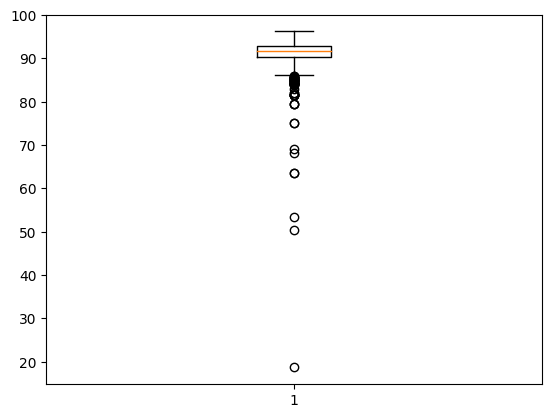

In [19]:
data_box= data.dropna()
datal_box= data_box['FFMC']
plt.boxplot(datal_box)

{'whiskers': [<matplotlib.lines.Line2D at 0x79ed90b2e740>,
 'caps': [<matplotlib.lines.Line2D at 0x79ed90b2ec80>,
 'boxes': [<matplotlib.lines.Line2D at 0x79ed90b2e4a0>],
 'medians': [<matplotlib.lines.Line2D at 0x79ed90b2f1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79ed90b2f460>],
 'means': []}

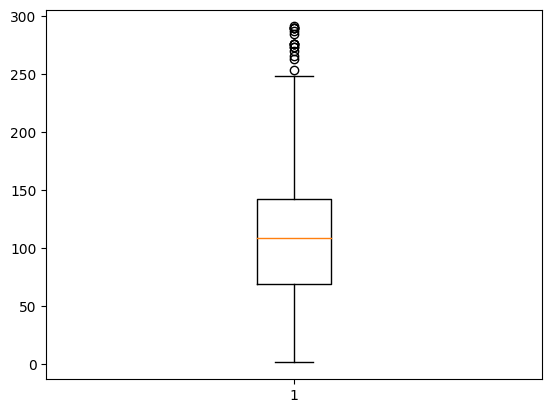

In [20]:
data_box= data.dropna()
datal_box= data_box['DMC']
plt.boxplot(datal_box)

{'whiskers': [<matplotlib.lines.Line2D at 0x79ed90badfc0>,
 'caps': [<matplotlib.lines.Line2D at 0x79ed90bae500>,
 'boxes': [<matplotlib.lines.Line2D at 0x79ed90badd20>],
 'medians': [<matplotlib.lines.Line2D at 0x79ed90baea40>],
 'fliers': [<matplotlib.lines.Line2D at 0x79ed90baece0>],
 'means': []}

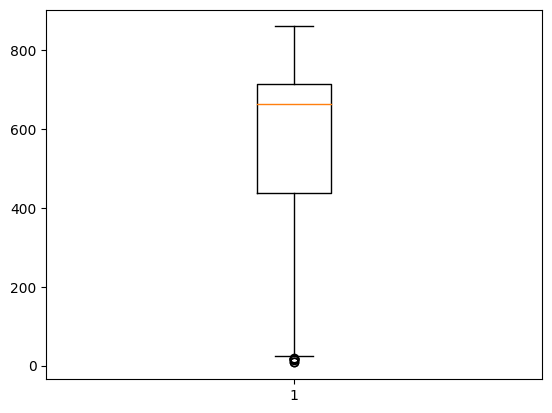

In [21]:
data_box= data.dropna()
datal_box= data_box['DC']
plt.boxplot(datal_box)

{'whiskers': [<matplotlib.lines.Line2D at 0x79ed90a38100>,
 'caps': [<matplotlib.lines.Line2D at 0x79ed90a38640>,
 'boxes': [<matplotlib.lines.Line2D at 0x79ed90c07f40>],
 'medians': [<matplotlib.lines.Line2D at 0x79ed90a38b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x79ed90a38e20>],
 'means': []}

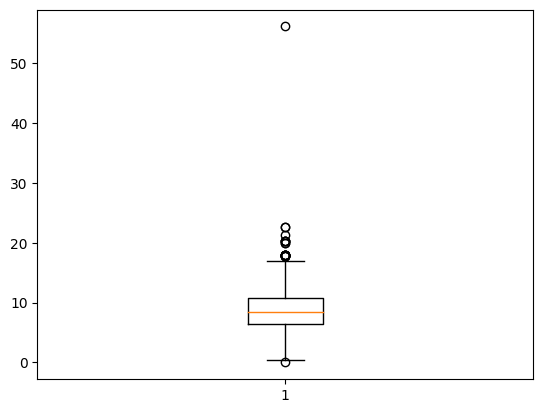

In [22]:
data_box= data.dropna()
datal_box= data_box['ISI']
plt.boxplot(datal_box)

{'whiskers': [<matplotlib.lines.Line2D at 0x79ed90a7af50>,
 'caps': [<matplotlib.lines.Line2D at 0x79ed90a7b490>,
 'boxes': [<matplotlib.lines.Line2D at 0x79ed90a7acb0>],
 'medians': [<matplotlib.lines.Line2D at 0x79ed90a7b9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79ed90a7bc70>],
 'means': []}

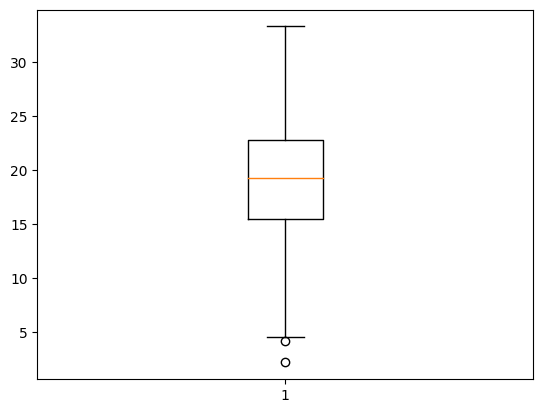

In [23]:
data_box= data.dropna()
datal_box= data_box['temp']
plt.boxplot(datal_box)

{'whiskers': [<matplotlib.lines.Line2D at 0x79ed90b098d0>,
 'caps': [<matplotlib.lines.Line2D at 0x79ed90b09e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x79ed90b09630>],
 'medians': [<matplotlib.lines.Line2D at 0x79ed90b0a350>],
 'fliers': [<matplotlib.lines.Line2D at 0x79ed90b0a5f0>],
 'means': []}

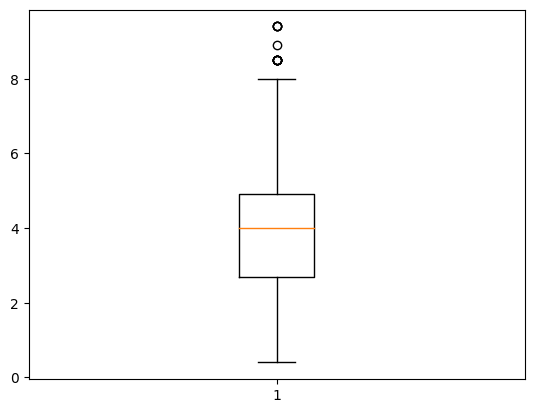

In [24]:
data_box= data.dropna()
datal_box= data_box['wind']
plt.boxplot(datal_box)

{'whiskers': [<matplotlib.lines.Line2D at 0x79ed9095eb30>,
 'caps': [<matplotlib.lines.Line2D at 0x79ed90994100>,
 'boxes': [<matplotlib.lines.Line2D at 0x79ed90a64700>],
 'medians': [<matplotlib.lines.Line2D at 0x79ed90994640>],
 'fliers': [<matplotlib.lines.Line2D at 0x79ed909948e0>],
 'means': []}

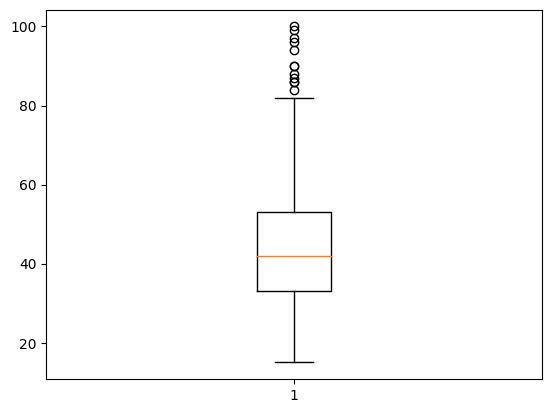

In [25]:
data_box= data.dropna()
datal_box= data_box['RH']
plt.boxplot(datal_box)

{'whiskers': [<matplotlib.lines.Line2D at 0x79ed909dddb0>,
 'caps': [<matplotlib.lines.Line2D at 0x79ed909de2f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79ed909ddb10>],
 'medians': [<matplotlib.lines.Line2D at 0x79ed909de860>],
 'fliers': [<matplotlib.lines.Line2D at 0x79ed909deb00>],
 'means': []}

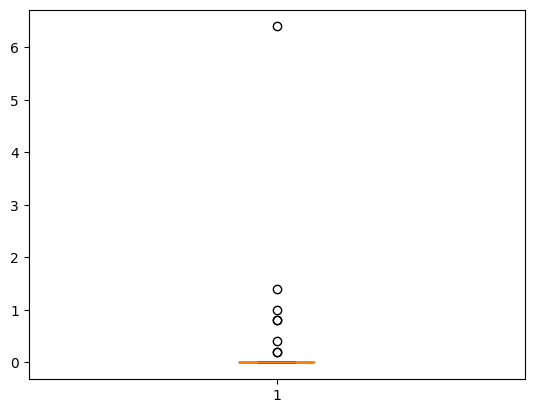

In [26]:
data_box= data.dropna()
datal_box= data_box['rain']
plt.boxplot(datal_box)

{'whiskers': [<matplotlib.lines.Line2D at 0x79ed9087c2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x79ed9087c7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79ed9084ffd0>],
 'medians': [<matplotlib.lines.Line2D at 0x79ed9087cd30>],
 'fliers': [<matplotlib.lines.Line2D at 0x79ed9087cfd0>],
 'means': []}

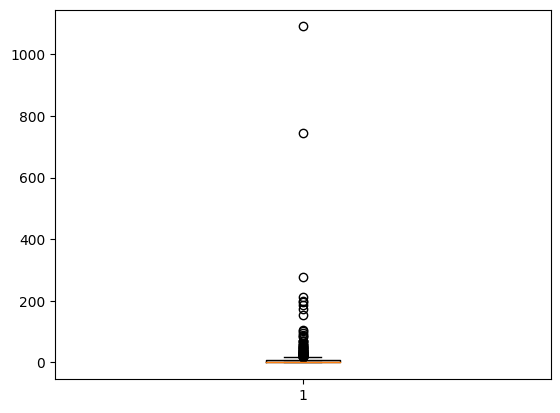

In [27]:
data_box= data.dropna()
datal_box= data_box['area']
plt.boxplot(datal_box)

**scaling data**

In [28]:
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions

**correlation analysis**

In [ ]:
#import seaborn as sns
#sns.pairplot(data)
#plt.suptitle('pairplot for all numeric values' , y=1.01, fontsize=17)


Text(0.5, 1.01, 'pairplot for all numeric values')

In [30]:
data.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609,-0.022063
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907,-0.034715
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857,-0.019428
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877,0.008726
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006,-0.006021
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596,0.045243
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476,-0.059113
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733,-0.050001
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573,-0.311322
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671,0.021810


In [31]:
data.shape

(517, 29)

**remove high influence points**

In [32]:
from sklearn.ensemble import IsolationForest
data1=data.copy()

#training the model
clf = IsolationForest(random_state=10, contamination=.01)
clf.fit(data1)
data1['anamoly'] = clf.predict(data1.iloc[:,0:29])
outliers = data1[data1['anamoly']==-1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [33]:
outliers

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,anamoly
276,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,17.85,0,...,0,0,0,0,0,0,0,0,0,-1
277,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,10.73,0,...,0,0,0,0,0,0,0,0,0,-1
278,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,22.03,0,...,0,0,0,0,0,0,0,0,0,-1
279,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,9.77,0,...,0,0,0,0,0,0,0,0,0,-1
281,85.4,25.4,349.7,2.6,5.1,24,8.5,0.0,24.77,0,...,0,0,0,0,0,0,0,0,0,-1
379,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00,0,...,1,0,0,0,0,0,0,0,1,-1


In [34]:
outliers.index

Int64Index([276, 277, 278, 279, 281, 379], dtype='int64')

In [35]:
data.drop([281, 299, 379, 463, 464, 469], axis=0, inplace=True)


In [36]:
data.shape

(511, 29)

# features selection using ppscore

In [37]:
!pip install ppscore

  Preparing metadata (setup.py) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13163 sha256=9fae9802a64253f4ea59e57b2e17d2404a22692135ce8b54c1017cd97e059b32
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore


In [38]:
import ppscore as pps

In [42]:
df=pd.read_csv("/content/forestfires.csv")

In [43]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [45]:
pps.score(df, 'month','size_category')

{'x': 'month',
 'y': 'size_category',
 'ppscore': 0.08489459588653184,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6175896610224436,
 'model_score': 0.6500542322127749,
 'model': DecisionTreeClassifier()}

In [46]:
pps.score(df, 'day','size_category')

{'x': 'day',
 'y': 'size_category',
 'ppscore': 1.2638129956266412e-05,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6175896610224436,
 'model_score': 0.6175944939740042,
 'model': DecisionTreeClassifier()}

In [47]:
pps.score(df, 'FFMC','size_category')

{'x': 'FFMC',
 'y': 'size_category',
 'ppscore': 0.027686347933910026,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6175896610224436,
 'model_score': 0.6281772067209007,
 'model': DecisionTreeClassifier()}

In [48]:
pps.score(df, 'DMC','size_category')

{'x': 'DMC',
 'y': 'size_category',
 'ppscore': 0.08726562102797655,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6175896610224436,
 'model_score': 0.6509609367408391,
 'model': DecisionTreeClassifier()}

In [49]:
pps.score(df, 'DC','size_category')

{'x': 'DC',
 'y': 'size_category',
 'ppscore': 0,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6175896610224436,
 'model_score': 0.6098463290054958,
 'model': DecisionTreeClassifier()}

In [51]:
pps.score(df, 'ISI','size_category')

{'x': 'ISI',
 'y': 'size_category',
 'ppscore': 0.029092180652178275,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6175896610224436,
 'model_score': 0.6287148116872394,
 'model': DecisionTreeClassifier()}

In [52]:
pps.score(df, 'RH','size_category')

{'x': 'RH',
 'y': 'size_category',
 'ppscore': 0.039268643697646384,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6175896610224436,
 'model_score': 0.6326063963700495,
 'model': DecisionTreeClassifier()}

In [53]:
pps.score(df, 'rain','size_category')

{'x': 'rain',
 'y': 'size_category',
 'ppscore': 1.2638129956266412e-05,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6175896610224436,
 'model_score': 0.6175944939740042,
 'model': DecisionTreeClassifier()}

In [54]:
pps.score(df, 'temp','size_category')

{'x': 'temp',
 'y': 'size_category',
 'ppscore': 0,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6175896610224436,
 'model_score': 0.6089720343250966,
 'model': DecisionTreeClassifier()}

In [55]:
pps.score(df, 'wind','size_category')

{'x': 'wind',
 'y': 'size_category',
 'ppscore': 0.08361831631624675,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6175896610224436,
 'model_score': 0.6495661697096721,
 'model': DecisionTreeClassifier()}

**SPLIT THE DATA**

In [56]:
X = data.drop(['size_category'],axis=1)
y = data.iloc[:,-1]

In [57]:

scaler = StandardScaler()
scale_data =pd.DataFrame(scaler.fit_transform(X),columns=X.columns)


In [58]:
scale_data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,-1.152145,-1.349327,-1.872882,-0.883826,-1.903660,0.439490,1.531449,-0.073700,-0.200487,2.238697,...,-0.126113,-0.191079,-0.044281,-0.258468,-0.179787,2.909117,-0.062684,-0.044281,-0.173902,-0.712302
1,-0.080103,-1.204539,0.475150,-0.529429,-0.180137,-0.692844,-1.758092,-0.073700,-0.200487,-0.446688,...,-0.126113,-0.191079,-0.044281,-0.258468,-0.179787,-0.343747,-0.062684,-0.044281,5.750362,-0.712302
2,-0.080103,-1.073914,0.547862,-0.529429,-0.778094,-0.692844,-1.531227,-0.073700,-0.200487,-0.446688,...,-0.126113,-0.191079,-0.044281,-0.258468,-0.179787,-0.343747,-0.062684,-0.044281,5.750362,-0.712302
3,0.187908,-1.237588,-1.941509,-0.019983,-1.886073,3.333233,0.000111,0.598809,-0.200487,2.238697,...,-0.126113,-0.191079,-0.044281,-0.258468,-0.179787,2.909117,-0.062684,-0.044281,-0.173902,-0.712302
4,-0.396842,-0.954306,-1.840611,0.112916,-1.340877,3.459048,-1.247646,-0.073700,-0.200487,-0.446688,...,-0.126113,-0.191079,-0.044281,-0.258468,-0.179787,2.909117,-0.062684,-0.044281,-0.173902,-0.712302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,-2.272916,-0.869322,0.460852,-1.592621,1.543386,-0.755751,-0.737200,-0.073700,-0.099737,-0.446688,...,-0.126113,-0.191079,-0.044281,-0.258468,-0.179787,-0.343747,-0.062684,-0.044281,-0.173902,-0.712302
507,-2.272916,-0.869322,0.460852,-1.592621,0.505754,1.697639,1.021003,-0.073700,0.648843,-0.446688,...,-0.126113,-0.191079,-0.044281,-0.258468,-0.179787,-0.343747,-0.062684,-0.044281,-0.173902,-0.712302
508,-2.272916,-0.869322,0.460852,-1.592621,0.382646,1.634732,1.531449,-0.073700,-0.025896,-0.446688,...,-0.126113,-0.191079,-0.044281,-0.258468,-0.179787,-0.343747,-0.062684,-0.044281,-0.173902,-0.712302
509,0.845752,0.536070,0.252928,0.489464,1.156472,-0.126677,0.000111,-0.073700,-0.200487,-0.446688,...,-0.126113,-0.191079,-0.044281,-0.258468,-0.179787,-0.343747,-0.062684,-0.044281,-0.173902,-0.712302


In [59]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 511, dtype: int64

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [61]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((408, 28), (103, 28), (408,), (103,))

**BUILD THE MODEL**

In [62]:
model = SVC(C=0.4, gamma=0.1, kernel='rbf')

In [63]:
model.fit(X_train,y_train)

SVC(C=0.4, gamma=0.1)

In [64]:
train_pred = model.predict(X_train)

In [65]:
confusion_matrix(y_train,train_pred)

array([[  0, 105],
       [  0, 303]])

In [66]:

print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       105
           1       0.74      1.00      0.85       303

    accuracy                           0.74       408
   macro avg       0.37      0.50      0.43       408
weighted avg       0.55      0.74      0.63       408



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
test_pred = model.predict(X_test)

In [68]:
confusion_matrix(y_test, test_pred)

array([[ 0, 32],
       [ 0, 71]])

In [69]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.69      1.00      0.82        71

    accuracy                           0.69       103
   macro avg       0.34      0.50      0.41       103
weighted avg       0.48      0.69      0.56       103



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


HYPERPARAMETER TUNING USING GRIDSEARCH CROSS VALIDATION

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
pgrid = [
    {
        'C':[0.4,0.45,0.5,0.55,0.6],
        'gamma':[0.1,0.01,1]
    }

]

In [72]:
model = SVC(kernel='rbf')

In [73]:
grid = GridSearchCV(model,param_grid=pgrid, cv=10)

In [74]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [0.4, 0.45, 0.5, 0.55, 0.6],
                          'gamma': [0.1, 0.01, 1]}])

In [75]:
grid.best_params_,grid.best_score_

({'C': 0.6, 'gamma': 0.01}, 0.7575000000000001)

In [76]:
pgrid = [
    {
        'C':[0.55,0.56,0.57,0.58,0.59,0.6],
        'gamma':[0.01,0.01,0.03]
    }

]

In [77]:
model = SVC(kernel='rbf')

In [78]:
grid = GridSearchCV(model,param_grid=pgrid, cv=10)

In [79]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [0.55, 0.56, 0.57, 0.58, 0.59, 0.6],
                          'gamma': [0.01, 0.01, 0.03]}])

In [80]:

grid.best_params_,grid.best_score_

({'C': 0.59, 'gamma': 0.01}, 0.7575000000000001)

BUILD THE FINAL MODEL

In [81]:

svclf = SVC(C=0.55,gamma=0.01,kernel='rbf')
svclf.fit(X_train,y_train)

SVC(C=0.55, gamma=0.01)

In [82]:

train_pred1 = svclf.predict(X_train)

In [83]:
confusion_matrix(y_train,train_pred1)

array([[ 12,  93],
       [  0, 303]])

In [84]:
print(classification_report(y_train,train_pred1))

              precision    recall  f1-score   support

           0       1.00      0.11      0.21       105
           1       0.77      1.00      0.87       303

    accuracy                           0.77       408
   macro avg       0.88      0.56      0.54       408
weighted avg       0.83      0.77      0.70       408



In [89]:
test_pred2 = svclf.predict(X_test)

In [90]:
confusion_matrix(y_test,test_pred2)

array([[ 0, 32],
       [ 0, 71]])

In [91]:
print(classification_report(y_test,test_pred2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.69      1.00      0.82        71

    accuracy                           0.69       103
   macro avg       0.34      0.50      0.41       103
weighted avg       0.48      0.69      0.56       103



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


VISUALIZE THE DATA

In [92]:
from sklearn.manifold import TSNE

In [93]:
tmodel = TSNE(n_components=2)
tcomps = tmodel.fit_transform(X,y)

In [94]:

tcomps

array([[ 40.989662 ,   3.4245121],
       [-28.261974 , -15.190768 ],
       [-28.94951  , -15.488643 ],
       ...,
       [-26.761623 , -13.6584   ],
       [  5.8211055,   3.9889753],
       [ 41.769085 ,   2.2216935]], dtype=float32)

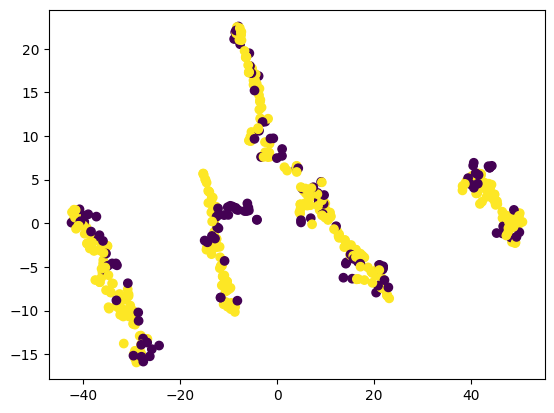

In [95]:
plt.scatter(tcomps[:,0], tcomps[:,1], c=y, cmap='viridis')

### **STILL THE CLASSIFICATION DONE PROPERLY**

RBF WITH GAMMA AS SCALE

In [96]:

svclf = SVC(C=0.55,gamma='scale',kernel='rbf')
svclf.fit(X_train,y_train)

SVC(C=0.55)

In [97]:


train_pred1 = svclf.predict(X_train)

In [98]:
confusion_matrix(y_train,train_pred1)

array([[  7,  98],
       [  0, 303]])

In [99]:
print(classification_report(y_train,train_pred1))

              precision    recall  f1-score   support

           0       1.00      0.07      0.12       105
           1       0.76      1.00      0.86       303

    accuracy                           0.76       408
   macro avg       0.88      0.53      0.49       408
weighted avg       0.82      0.76      0.67       408



In [100]:
test_pred2 = svclf.predict(X_test)

In [101]:
confusion_matrix(y_test,test_pred2)

array([[ 2, 30],
       [ 0, 71]])

In [102]:
print(classification_report(y_test,test_pred2))

              precision    recall  f1-score   support

           0       1.00      0.06      0.12        32
           1       0.70      1.00      0.83        71

    accuracy                           0.71       103
   macro avg       0.85      0.53      0.47       103
weighted avg       0.80      0.71      0.61       103



rfb kernel with gamma as auto

In [103]:
svclf = SVC(C=0.55,gamma='auto',kernel='rbf')
svclf.fit(X_train,y_train)

SVC(C=0.55, gamma='auto')

In [104]:
train_pred=svclf.predict(X_train)

In [105]:
confusion_matrix(y_train,train_pred)

array([[ 10,  95],
       [  0, 303]])

In [106]:

print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       1.00      0.10      0.17       105
           1       0.76      1.00      0.86       303

    accuracy                           0.77       408
   macro avg       0.88      0.55      0.52       408
weighted avg       0.82      0.77      0.69       408



In [107]:
test_pred = svclf.predict(X_test)

In [108]:
confusion_matrix(y_test,test_pred)

array([[ 0, 32],
       [ 0, 71]])

In [109]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.69      1.00      0.82        71

    accuracy                           0.69       103
   macro avg       0.34      0.50      0.41       103
weighted avg       0.48      0.69      0.56       103



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


rbf kernel with polynomial

In [110]:



clf = SVC()
param_grids = [{'kernel':['poly'], 'degree':[0,1,2,3,4,5,6], 'C': [15,14,13,12,11,10,1,0.1,0.001]}]
grid = GridSearchCV(clf, param_grids, cv=20)
grid.fit(X_train,y_train)

GridSearchCV(cv=20, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 1, 0.1, 0.001],
                          'degree': [0, 1, 2, 3, 4, 5, 6],
                          'kernel': ['poly']}])

In [111]:
grid.best_score_, grid.best_params_

(0.8777380952380952, {'C': 15, 'degree': 5, 'kernel': 'poly'})

In [112]:
clf1=SVC(kernel='poly', C=15, degree =6 )
clf1.fit(X_train, y_train)


SVC(C=15, degree=6, kernel='poly')

In [113]:
train_pred = clf1.predict(X_train)


In [114]:
confusion_matrix(y_train,train_pred)

array([[ 63,  42],
       [  0, 303]])

In [115]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75       105
           1       0.88      1.00      0.94       303

    accuracy                           0.90       408
   macro avg       0.94      0.80      0.84       408
weighted avg       0.91      0.90      0.89       408



In [116]:
test_pred = clf1.predict(X_test)

In [117]:
confusion_matrix(y_test,test_pred)

array([[19, 13],
       [ 0, 71]])

In [118]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      0.59      0.75        32
           1       0.85      1.00      0.92        71

    accuracy                           0.87       103
   macro avg       0.92      0.80      0.83       103
weighted avg       0.89      0.87      0.86       103



kernel with gamma as linear

In [119]:
clf = SVC()
param_grids = [{'kernel':['linear'], 'C': [15,14,13,12,11,10,1,0.1,0.001]}]
grid = GridSearchCV(clf, param_grids, cv=10)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 1, 0.1, 0.001],
                          'kernel': ['linear']}])

In [120]:
grid.best_score_, grid.best_params_

(0.9851829268292682, {'C': 0.1, 'kernel': 'linear'})

In [121]:
clf2=SVC(kernel='linear', C=1 )
clf2.fit(X_train, y_train)


SVC(C=1, kernel='linear')

In [122]:
train_pred = clf2.predict(X_train)

In [123]:
confusion_matrix(y_train,train_pred)

array([[105,   0],
       [  0, 303]])

In [124]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00       303

    accuracy                           1.00       408
   macro avg       1.00      1.00      1.00       408
weighted avg       1.00      1.00      1.00       408



In [125]:
test_pred= clf2.predict(X_test)

In [126]:
confusion_matrix(y_test,test_pred)

array([[32,  0],
       [ 0, 71]])

In [127]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        71

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103



In [137]:


from sklearn.ensemble import RandomForestClassifier

In [129]:




rf_model = RandomForestClassifier(n_estimators=20, max_depth=8, random_state=42)

In [130]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, n_estimators=20, random_state=42)

In [131]:
train_pred = rf_model.predict(X_train)


In [132]:
confusion_matrix(y_train,train_pred)

array([[105,   0],
       [  0, 303]])

In [133]:

print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00       303

    accuracy                           1.00       408
   macro avg       1.00      1.00      1.00       408
weighted avg       1.00      1.00      1.00       408



In [134]:
test_pred = rf_model.predict(X_test)

In [135]:
confusion_matrix(y_test,test_pred)

array([[32,  0],
       [ 0, 71]])

In [136]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        71

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103



* gamma as linear gives best results
* random forest also gives best results